# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lng = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Lists and counters
city_names = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index = 0
set = 1

In [4]:
# call api and make url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
print("Beginning Data Retrieval ")
print("------------------------------")

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        
        if index > 49:
            index = 0
            set = set + 1
        
        else:
            index = index + 1
        
        print(f"Processing Record {index} of Set {set} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval 
------------------------------
Processing Record 2 of Set 523 : mar del plata
City not found. Skipping...
Processing Record 4 of Set 523 : pangoa
Processing Record 5 of Set 523 : castro
Processing Record 6 of Set 523 : atuona
Processing Record 7 of Set 523 : hermanus
Processing Record 8 of Set 523 : rikitea
Processing Record 9 of Set 523 : omsukchan
Processing Record 10 of Set 523 : vanimo
Processing Record 11 of Set 523 : georgetown
Processing Record 12 of Set 523 : gobabis
Processing Record 13 of Set 523 : porbandar
Processing Record 14 of Set 523 : hilo
Processing Record 15 of Set 523 : lorengau
Processing Record 16 of Set 523 : kaitangata
Processing Record 17 of Set 523 : sambava
Processing Record 18 of Set 523 : ushuaia
City not found. Skipping...
Processing Record 20 of Set 523 : ilulissat
Processing Record 21 of Set 523 : mahebourg
Processing Record 22 of Set 523 : barrow
Processing Record 23 of Set 523 : upernavik
Processing Record 24 of Set 523 : vict

Processing Record 0 of Set 660 : saint george
Processing Record 0 of Set 661 : aklavik
Processing Record 0 of Set 662 : bonfim
Processing Record 0 of Set 663 : bend
Processing Record 0 of Set 664 : whitefish
Processing Record 0 of Set 665 : port pirie
Processing Record 0 of Set 666 : bambous virieux
Processing Record 0 of Set 667 : chengde
Processing Record 0 of Set 668 : nizwa
Processing Record 0 of Set 669 : carballo
Processing Record 0 of Set 670 : ahipara
Processing Record 0 of Set 671 : mayumba
Processing Record 0 of Set 672 : dingle
Processing Record 0 of Set 673 : raton
Processing Record 0 of Set 674 : hokitika
City not found. Skipping...
Processing Record 0 of Set 675 : gaogou
Processing Record 0 of Set 676 : mayo
City not found. Skipping...
Processing Record 0 of Set 677 : presidencia roque saenz pena
City not found. Skipping...
Processing Record 0 of Set 678 : korla
Processing Record 0 of Set 679 : salalah
Processing Record 0 of Set 680 : mandurah
Processing Record 0 of Set 6

Processing Record 0 of Set 846 : gamba
Processing Record 0 of Set 847 : esperance
Processing Record 0 of Set 848 : chongwe
Processing Record 0 of Set 849 : praia da vitoria
Processing Record 0 of Set 850 : tolyatti
Processing Record 0 of Set 851 : muzaffargarh
Processing Record 0 of Set 852 : jiuquan
Processing Record 0 of Set 853 : ojinaga
Processing Record 0 of Set 854 : ixtapa
Processing Record 0 of Set 855 : impfondo
Processing Record 0 of Set 856 : high level
Processing Record 0 of Set 857 : dzhebariki-khaya
Processing Record 0 of Set 858 : iiyama
Processing Record 0 of Set 859 : deputatskiy
Processing Record 0 of Set 860 : kirakira
City not found. Skipping...
Processing Record 0 of Set 861 : zaysan
Processing Record 0 of Set 862 : lapy
Processing Record 0 of Set 863 : khovu-aksy
Processing Record 0 of Set 864 : filadelfia
Processing Record 0 of Set 865 : darhan
Processing Record 0 of Set 866 : touros
Processing Record 0 of Set 867 : nampula
Processing Record 0 of Set 868 : hanko


Processing Record 0 of Set 1030 : stabat
Processing Record 0 of Set 1031 : beloha
Processing Record 0 of Set 1032 : amga
Processing Record 0 of Set 1033 : saint-augustin
Processing Record 0 of Set 1034 : araouane
Processing Record 0 of Set 1035 : wad madani
Processing Record 0 of Set 1036 : puerto carreno
Processing Record 0 of Set 1037 : margate
Processing Record 0 of Set 1038 : qingdao
Processing Record 0 of Set 1039 : bubaque
Processing Record 0 of Set 1040 : rio gallegos
Processing Record 0 of Set 1041 : chaman
Processing Record 0 of Set 1042 : antofagasta
Processing Record 0 of Set 1043 : goundam
Processing Record 0 of Set 1044 : iskateley
Processing Record 0 of Set 1045 : beian
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame({
    "City" : city_names,
    "Cloudiness" : cloud,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp, 
    "Wind Speed" : wind_speed
})

In [10]:
weather_df.count()

City          1132
Cloudiness    1132
Country       1132
Date          1132
Humidity      1132
Lat           1132
Lng           1132
Max Temp      1132
Wind Speed    1132
dtype: int64

In [13]:
weather_df.head()
weather_df.to_csv("../output_data/cities.csv", index=False)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

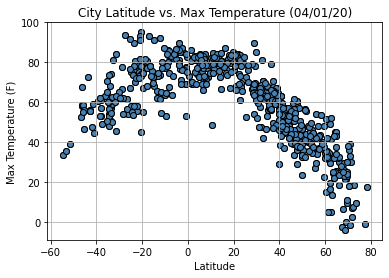

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

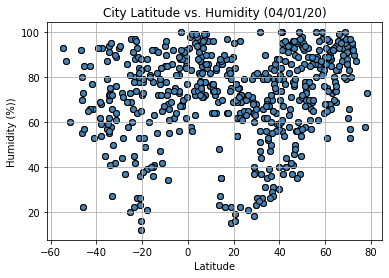

In [16]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

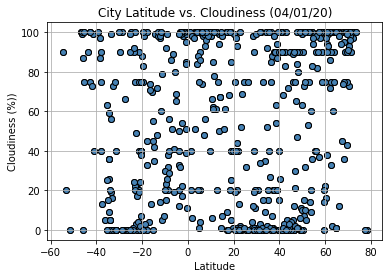

In [19]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

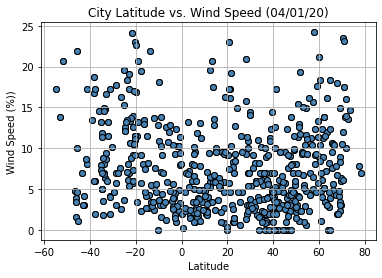

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


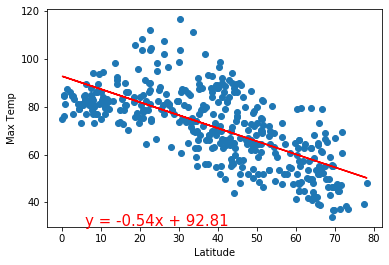

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


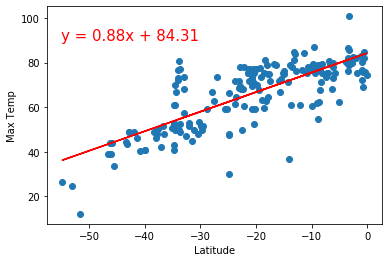

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


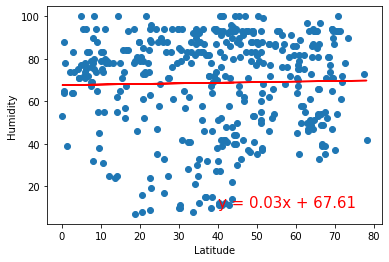

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


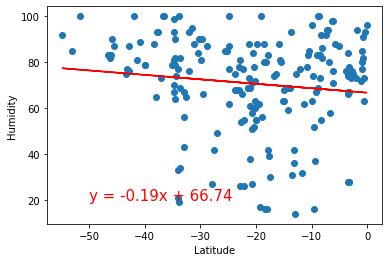

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


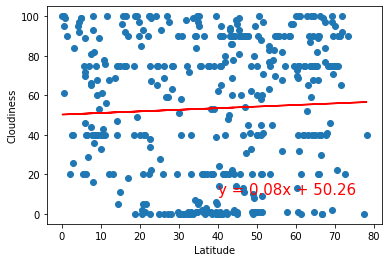

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


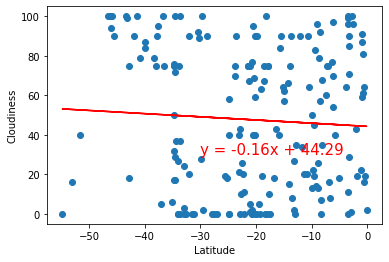

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


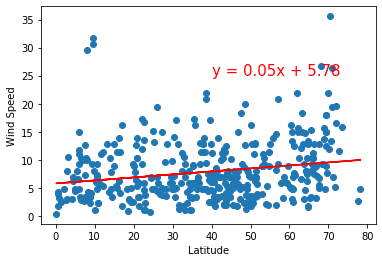

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


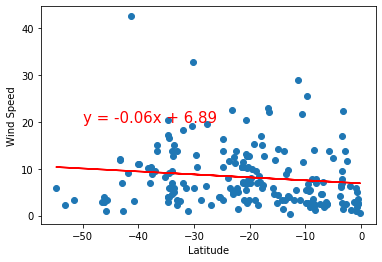